## Image Formation, Image Processing, Image Filtering (10pts)
<em>University of Virginia - Introduction to Computer Vision - Fall 2019 - Vicente Ordonez - vicente@virginia.edu</em><br/><br/>

In this lab we will apply our knowledge in the lectures on Image Formation, Illumination, and Image Processing through a series of excercises focused on practical skills to build more complex applications.

### 1. Image Formation: From World Coordinates to Image Coordinates (3pts).
The objective of this section will be to render a 3d cube. The coordinates for the cube are specified below by the variable cube_pts, and there is also a definition of points to show the world coordinate axes (axes_pts). The camera has a focal length of 3.0, and is located at position (1, 1, 4) and oriented perpendicular to the image plane (no rotation).

**1.1 ** Convert the cube_pts and axes_pts to homegeneous coordinates (0.5pts)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the faces of the cube.
cube_pts = np.array(
               [[[0,0,0], [0,0,1], [0,1,1], [0,1,0], [0,0,0]],   # Face 1.
               [[0,0,0], [0,1,0], [1,1,0], [1,0,0], [0,0,0]],    # Face 2.
               [[1,0,0], [1,0,1], [1,1,1], [1,1,0], [1,0,0]],    # Face 3.
               [[0,0,1], [0,1,1], [1,1,1], [1,0,1], [0,0,1]]])   # Face 4.

# Definition of points to show the world coordinate axes.
axes_pts = np.array([[[0,0,0], [10,0,0]], # X-axis
                     [[0,0,0], [0,10,0]], # Y-axis
                     [[0,0,0], [0,0,10]]]) # Z-axis

In [0]:
A = cube_pts.tolist()
for i in A:
  for j in i:
    j.append(1)
cube_pts = np.asarray(A)

B = axes_pts.tolist()
for i in B:
  for j in i:
    j.append(1)
axes_pts = np.asarray(B)


**1.2** Define the Camera Matrix C = K [R t] below, where K is the intrinsic camera matrix and [R t] is the extrinsic camera matrix. Keep in mind that the camera has a focal length of 3.0, and is located at position (1, 1, 4) and oriented perpendicular to the image plane (no rotation). (0.5pts).

In [0]:
# Intrinsic Camera Matrix.
f = 3.0 # focal length.
K = np.array(
               [[f,0,0], [0,f,0], [0,0,1]])

# Extrinsic Camera Parameters.
Rt = np.array(
               [[1,0,0,1], [0,1,0,1], [0,0,1,4]])

# Camera matrix.
Camera_matrix = np.dot(K, Rt)

**1.3** Project the cube_pts and axes_pts in homegeneous coordinates to the image plane and convert to cartesian coordinates in 2D (2pts)

In [5]:
# Project 3D homegeneous coordinates into 2D coordinates 
# (cube).

A = cube_pts.tolist()
for i in range(4):
  for j in range(5):
    A[i][j]=np.dot(Camera_matrix, A[i][j]).tolist()
print('2D cube_pts homegeneous coordinates', np.asarray(A))
    
# Convert homogeneous coordinates back to cartesian.
for i in range(4):
  for j in range(5):
    A[i][j] = [A[i][j][0]/A[i][j][2],A[i][j][1]/A[i][j][2]]
print('cube_pts convert to cartesian coordinates', np.asarray(A))

# Project 3D homegeneous coordinates into 2D coordinates
# (axes).

B = axes_pts.tolist()
for i in range(3):
  for j in range(2):
    B[i][j]=np.dot(Camera_matrix, B[i][j]).tolist()
print('2D axes_pts homegeneous coordinates', np.asarray(B))

# Convert homogeneous coordinates back to cartesian.
# (axes)
for i in range(3):
  for j in range(2):
    B[i][j] = [B[i][j][0]/B[i][j][2],B[i][j][1]/B[i][j][2]]
print('axes_pts convert to cartesian coordinates', np.asarray(B))

p_cube_pts = np.asarray(A)
p_axes_pts = np.asarray(B)

2D cube_pts homegeneous coordinates [[[3. 3. 4.]
  [3. 3. 5.]
  [3. 6. 5.]
  [3. 6. 4.]
  [3. 3. 4.]]

 [[3. 3. 4.]
  [3. 6. 4.]
  [6. 6. 4.]
  [6. 3. 4.]
  [3. 3. 4.]]

 [[6. 3. 4.]
  [6. 3. 5.]
  [6. 6. 5.]
  [6. 6. 4.]
  [6. 3. 4.]]

 [[3. 3. 5.]
  [3. 6. 5.]
  [6. 6. 5.]
  [6. 3. 5.]
  [3. 3. 5.]]]
cube_pts convert to cartesian coordinates [[[0.75 0.75]
  [0.6  0.6 ]
  [0.6  1.2 ]
  [0.75 1.5 ]
  [0.75 0.75]]

 [[0.75 0.75]
  [0.75 1.5 ]
  [1.5  1.5 ]
  [1.5  0.75]
  [0.75 0.75]]

 [[1.5  0.75]
  [1.2  0.6 ]
  [1.2  1.2 ]
  [1.5  1.5 ]
  [1.5  0.75]]

 [[0.6  0.6 ]
  [0.6  1.2 ]
  [1.2  1.2 ]
  [1.2  0.6 ]
  [0.6  0.6 ]]]
2D axes_pts homegeneous coordinates [[[ 3.  3.  4.]
  [33.  3.  4.]]

 [[ 3.  3.  4.]
  [ 3. 33.  4.]]

 [[ 3.  3.  4.]
  [ 3.  3. 14.]]]
axes_pts convert to cartesian coordinates [[[0.75       0.75      ]
  [8.25       0.75      ]]

 [[0.75       0.75      ]
  [0.75       8.25      ]]

 [[0.75       0.75      ]
  [0.21428571 0.21428571]]]


Here we provide code to plot the cube and the axes, and include a plot of how the output should look like so one can check the correct answer. <br/>
**Note:** You are expected to present here the output of your own code running and not the plot included in the assignmnet. Feel free to modify the code below if you stored your projected points in a different data structure, or in a different arrangement.

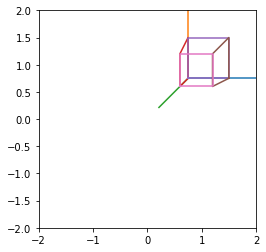

In [6]:
# p_axes_pts are the projected points of the axes in 2d cartesian coords.
# p_axes_pts is assumed to have a shape 3x2x2.
# p_cube_pts are the projected points of the cube in 2d cartesian coords.
# p_cube_pts is assumed to have a shape 4x5x2.

plt.figure()
plt.axis([-2, 2, -2, 2])

# Draw the three axes.
plt.plot(p_axes_pts[0, :, 0], p_axes_pts[0, :, 1]) # Axis 1.
plt.plot(p_axes_pts[1, :, 0], p_axes_pts[1, :, 1]) # Axis 2.
plt.plot(p_axes_pts[2, :, 0], p_axes_pts[2, :, 1]) # Axis 3.

# Draw the cube faces.
plt.plot(p_cube_pts[0, :, 0], p_cube_pts[0, :, 1]) # Face 1.
plt.plot(p_cube_pts[1, :, 0], p_cube_pts[1, :, 1]) # Face 2.
plt.plot(p_cube_pts[2, :, 0], p_cube_pts[2, :, 1]) # Face 3.
plt.plot(p_cube_pts[3, :, 0], p_cube_pts[3, :, 1]) # Face 4.

plt.gca().set_aspect('equal')
plt.show()

**Final comments:** After finishing this section we will have a basic 3D wireframe rendering engine! It can only render a cube, but sophisticated 3d engines such as OpenGL also render only triangles. They just build every more complex shape out of triangles. Try changing the skew parameter in the intrinsic camera matrix and see the effect of skewing the cube. Given the above exercise, would you be able to rotate the camera around the cube? You would need to place the location of the camera on positions around a circle and make sure it is rotated so that it looks the center of the cube.

### 2. Image Processing: Enhancing an Image to Make it Look Better (3pts).

In this section we will write functions to augment or reduce the brightness of an image and create a vignette effect. First, code below is provided to load an RGB image into a numpy array with 3 dimensions.

Image size:  (416, 600, 3)


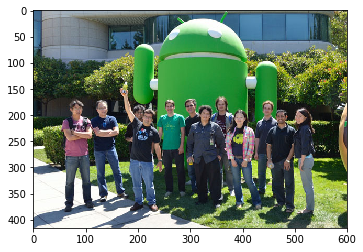

In [7]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Try maybe downloading the image in case the CS webserver goes down.
img_url = 'http://www.cs.virginia.edu/~vicente/images/google_android.jpg'
img = imageio.imread(img_url)

# Show the image size.
print('Image size: ', img.shape)

# Plot the image.
def display_image(img):
  plt.figure()
  plt.imshow(img)
  plt.grid(False)
  plt.show()
  
display_image(img)

**2.1** Enhance the brightness of the above image so that brightness increases by a factor of 2. We are including below what the ouptut image should look like if you completed this step correctly. [Hint: this involves just scaling each pixel intensity in all channels by 2, but the img array is a uint8 type array and we should avoid overflows]  (1pts)

---



> Indented block



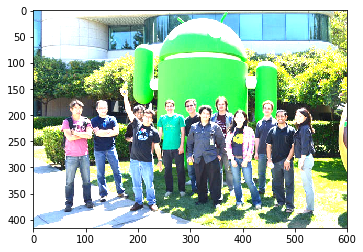

In [8]:

bright_image = img
for i in range(416):
  for j in range(600):
    for k in range(3):
      if bright_image[i][j][k]*2 > 255:
        bright_image[i][j][k] = 255
      else:
        bright_image[i][j][k] = bright_image[i][j][k]*2
display_image(bright_image)

**2.3** We are going to implement here a vignette effect similar to the one on Instagram when you go to Edit -> Vignette. The basic idea is to make things on the boundary of the image darker and leave the pixels near the center of the image almost unchanged. We are providing below an output of what the resulting image should look like.  (2pts)

> Indented block



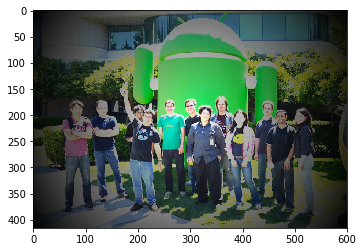

In [9]:
import math
vignette_image = img
for i in range(416):
  for j in range(600):
    dist = math.sqrt((i - 208)**2 + (j - 300)**2)
    dia = math.sqrt((208)**2 + (300)**2)
    ratio = dist/dia
    vignette_image[i][j] = (1-ratio) * vignette_image[i][j]
display_image(vignette_image)

**Final comments:** If you finished this section. Would your vignette implementation work in realtime? e.g. for real-time videoconferencing? This needs a really fast implementation. If you used for loops in any of your implementations, chances are that your implementation is not the fastest, but still acceptable for the purposes of this assignment. Also, for the vignette effect you could also allow the user to control the intensity of the effect, how would one implement that?

### 3. Image Filtering: Convolving Images (4pts).
Here we will experiment with image filtering through the convolution operator. These are operations where your output depends on a neighborhood of pixels as opposed to one-to-one pixel mapping eas we did in the previous section. We will use the same image as before but now will be working on grayscale.

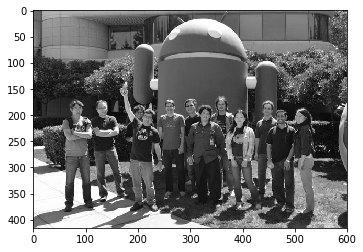

In [8]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Try maybe downloading the image in case the CS webserver goes down.
img_url = 'http://www.cs.virginia.edu/~vicente/images/google_android.jpg'
img = imageio.imread(img_url)

# Converting image to grayscale.
img = img.astype('float')
img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0

# Plot the image.
def display_image(img):
  plt.figure()
  plt.gray()
  plt.imshow(img)
  plt.grid(False)
  plt.show()

display_image(img)

**3.1** Implement a Gaussian Blur of this image using a square neighborhood of $15\times15$ pixels with $\mu=(0, 0)$ and $\sigma=0.8$. 
Assume a symmetric 2D Gaussian distribution: e.g. $$G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$.  
Note: Feel free to use the scipy.signal.convolve2d function or implement your own, but no other external function or library will be allowed here aside from numpy, math, and matplotlib. Again, desired result is included here so you can check if your implementation is correct. Hint: Your kernel matrix has to be symmetric. (2pts) 

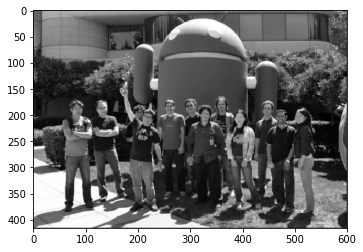

In [9]:
import numpy as np
import math
from scipy import signal
G = np.zeros((15, 15))
for i in range(15):
  for j in range(15):
    G[i][j] = 1/(2*math.pi*0.8**2)*math.e**(-((i-7)**2+(j-7)**2)/(2*0.8**2))
blurred_image = signal.convolve2d(img, G, mode="same")
display_image(blurred_image)

Comments: What happens if $\sigma$ is larger? Does this make the image more blurry or less blurry? Why?

**3.2** Here we will display the spatial derivatives (gradients) of the image in the x-axis direction and the y-axis direction by showing the resultant magnitude between the two. Display as an image the magnitude of the gradients at each pixel location. Use the second order Sobel operators studied in class. Note: Feel free to use the scipy.signal.convolve2d function or implement your own, but no other external function or library will be allowed here aside from numpy, math, and matplotlib. Again, desired result is included here so you can check if your implementation is correct. (1pt)

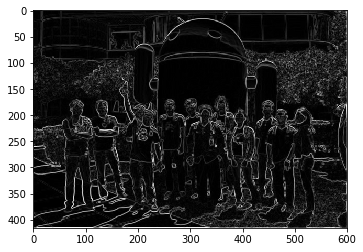

In [10]:
# Your code goes here.
x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
magnitude_map1 = signal.convolve2d(img, x,mode="same")
magnitude_map2 = signal.convolve2d(img, y,mode="same")
magnitude_map = np.sqrt(magnitude_map1**2+magnitude_map2**2)
display_image(magnitude_map)

**3.3** Use the above output to emphasize the boundaries of the objects in the original grayscale image. Depending on how you do it this will look more or less different so only use the sample output here as a guideline, but be creative and make the boundaries be highlighted. (1pt)

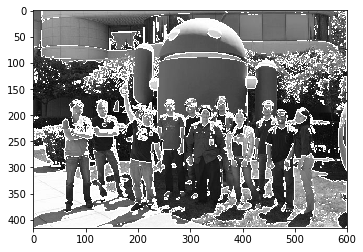

In [17]:
# Your code goes here.
output_image = img
for i in range(416):
  for j in range(600):
    if magnitude_map[i][j]>=200:
      output_image[i][j] = 255
display_image(output_image)

**Final Comments:** Any of the filtering transformations in this section can be applied to color images. We can just apply the transformation to each channel individually. Try some of your implemented filters in the original RGB input using this approach. Feel free to experiment and create new filters of your own.